In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Modify Database

In [2]:
data = pd.read_csv('database.csv')
data.head()

,Region,Country,CityCode,City,Month,Year,AvgTemp
0,Asia,Indonesia,0,Singapore,1,1825,-1.115
1,Asia,Indonesia,0,Singapore,2,1825,-1.241
2,Asia,Indonesia,0,Singapore,3,1825,-0.968
3,Asia,Indonesia,0,Singapore,4,1825,-0.266
4,Asia,Indonesia,0,Singapore,5,1825,-0.177


In [5]:
Total = data.isnull().sum().sort_values(ascending = False)          
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Region,0,0.0
Country,0,0.0
CityCode,0,0.0
City,0,0.0
Month,0,0.0
Year,0,0.0
AvgTemp,0,0.0


In [4]:
data = data[data['Year']>=1900] #Soluzione, no valori parziali

In [26]:
data.to_csv('databaseReduction.csv', index = False)

NameError: name 'df' is not defined

In [27]:
df = pd.read_csv('databaseReduction.csv')
print(df['Country'].unique())
print(df['City'].unique())
print(df['CityCode'].unique())
print(df['Region'].unique())

['Indonesia' 'Kenya' 'Vietnam' 'India' 'Nigeria' 'Peru' 'Thailand'
 'Brazil' 'Philippines' 'Senegal' 'Sudan' 'Myanmar' 'Dominican Republic'
 'Zimbabwe' 'Somalia' 'Mexico' 'Saudi Arabia' 'China' 'Bangladesh'
 'Taiwan' 'Pakistan' 'Egypt' 'South Africa' 'Iraq' 'Morocco' 'Argentina'
 'United States of America' 'Japan' 'Afghanistan' 'Australia' 'Syria'
 'Iran' 'North Korea' 'Greece' 'Turkey' 'Colombia' 'Republic of the Congo'
 'Spain' 'Italy' 'Canada' 'France' 'Ivory Coast' 'Ukraine'
 'United Kingdom' 'Germany' 'Russia' 'United Republic of Tanzania'
 'Ethiopia' 'Angola']
['Singapore' 'Nairobi' 'H' 'Maisuru' 'Kano' 'Lima' 'Madras' 'Bangkok'
 'Salvador' 'Manila' 'Dakar' 'Um' 'Brasília' 'Hyderabad' 'Rangoon' 'Sant'
 'Bombay' 'Pune' 'Harare' 'Mogadishu' 'Mexico' 'Bel' 'Jiddah' 'Vadodara'
 'Nagpur' 'Guangzhou' 'Ahmadabad' 'Calcutta' 'Dhaka' 'Ri' 'Sã' 'Taipei'
 'Riyad' 'Karachi' 'Jaipur' 'Kanpur' 'Ne' 'Chongqing' 'Wuhan' 'Cairo'
 'Durban' 'Chengdu' 'Nanjing' 'Shanghai' 'Alexandria' 'Lahore' 'Bagh

In [38]:
data_europe = df.loc[df['Region'] == 'Europe']
euro = data_europe['City'].unique().tolist()
print(euro)
for eu in euro:
    data_europe.loc[data_europe['City'] == eu]

['Izmir', 'Madrid', 'Rome', 'Paris', 'Kiev', 'London', 'Berlin', 'Moscow', 'Sain']


# Data Analysis

In [23]:
data = pd.read_csv('databaseReduction.csv')
data["Date"] = pd.to_datetime(data['Year'].astype(str) +"-"+ data["Month"].astype(str))
data.set_index(data['Date'], inplace = True)

Qui deve avvenire tipo:
Primo task
Seleziona la città che intendi visualizzare EX: Rome
Fa vedere il plot dal 1990 fino alla data attuale

Secondo task
Seleziona la regione che intendi visualizzare EX: Africa
Fa vedere il plot dal 1990 fino alla data attuale

Terzo task
Seleziona lo Stato che intendi visualizzare EX: North Korea
Fa vedere il plot dal 1990 fino alla data attuale

## Primo Task

In [4]:
chennai_data = data[data.City == 'Rome']
chennai_data.head()

,Region,Country,CityCode,City,Month,Year,AvgTemp,Date
Date,,,,,,,,
1900-01-01,Europe,Italy,75,Rome,1,1900,0.732,1900-01-01
1900-02-01,Europe,Italy,75,Rome,2,1900,1.614,1900-02-01
1900-03-01,Europe,Italy,75,Rome,3,1900,-1.990,1900-03-01
1900-04-01,Europe,Italy,75,Rome,4,1900,-1.112,1900-04-01
1900-05-01,Europe,Italy,75,Rome,5,1900,-0.381,1900-05-01


In [5]:
chennai_data = chennai_data['1970':]
cols = ['Date', 'Region', 'Country', 'CityCode', 'City', 'Year', 'Month']
chennai_data.drop(cols, axis = 1, inplace = True)
chennai_data


,AvgTemp
Date,
1970-01-01,1.640
1970-02-01,0.010
1970-03-01,-0.876
1970-04-01,-0.349
1970-05-01,-1.748
...,...
2020-08-01,2.737
2020-09-01,1.727
2020-10-01,-0.037


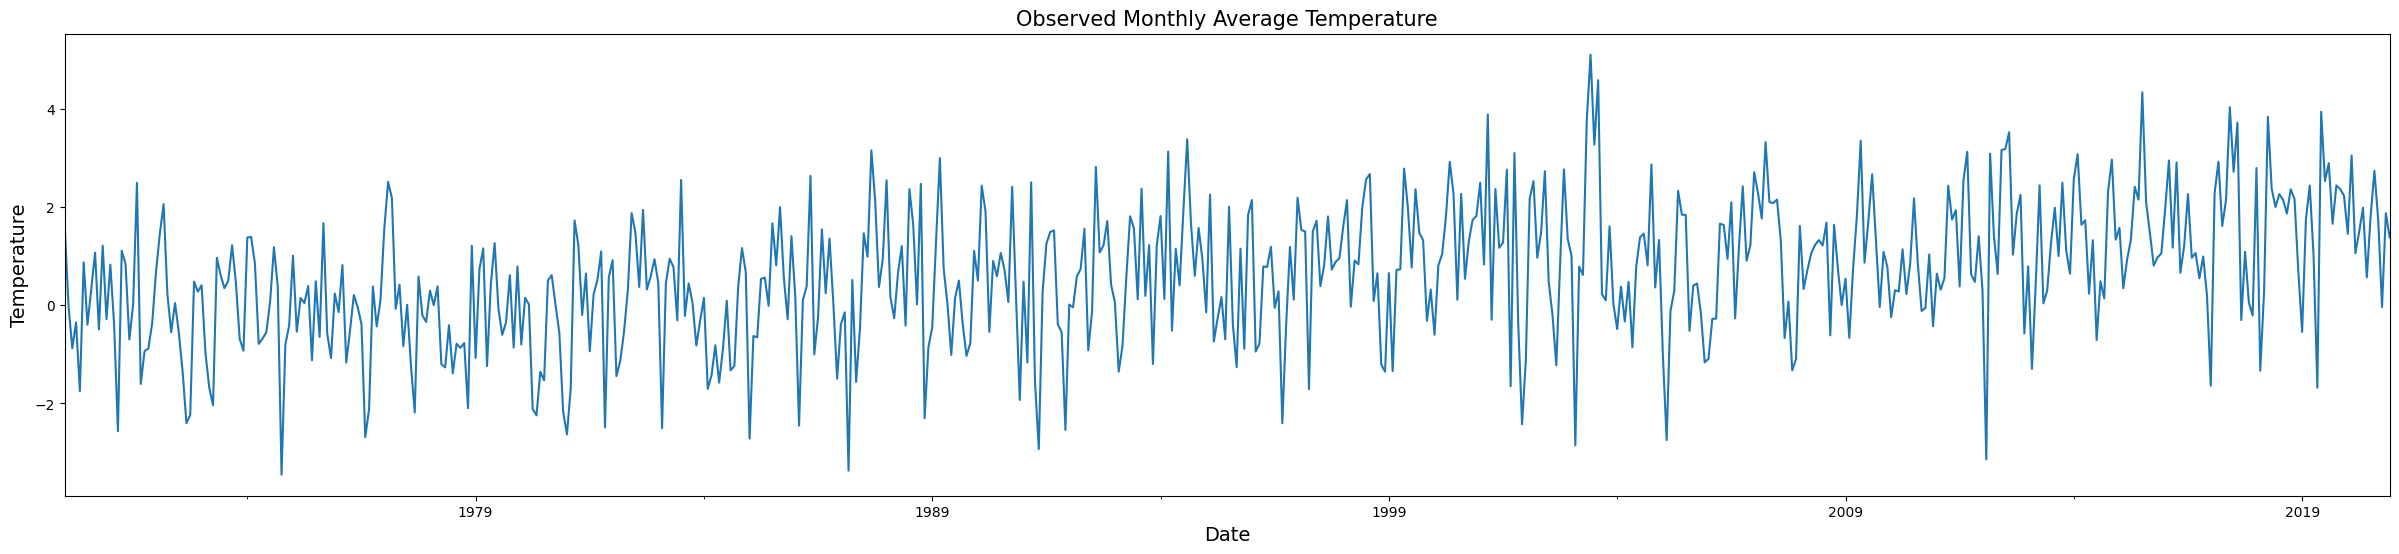

In [6]:
chennai_data.plot(figsize = (30, 6), legend = None)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Observed Monthly Average Temperature', fontsize = 15)
plt.show()

import matplotlib.pyplot as plt
import numpy as np

arr = np.random.normal(1, 1, size=100)
fig, ax = plt.subplots()
ax.hist(arr, bins=20)

st.pyplot(fig)

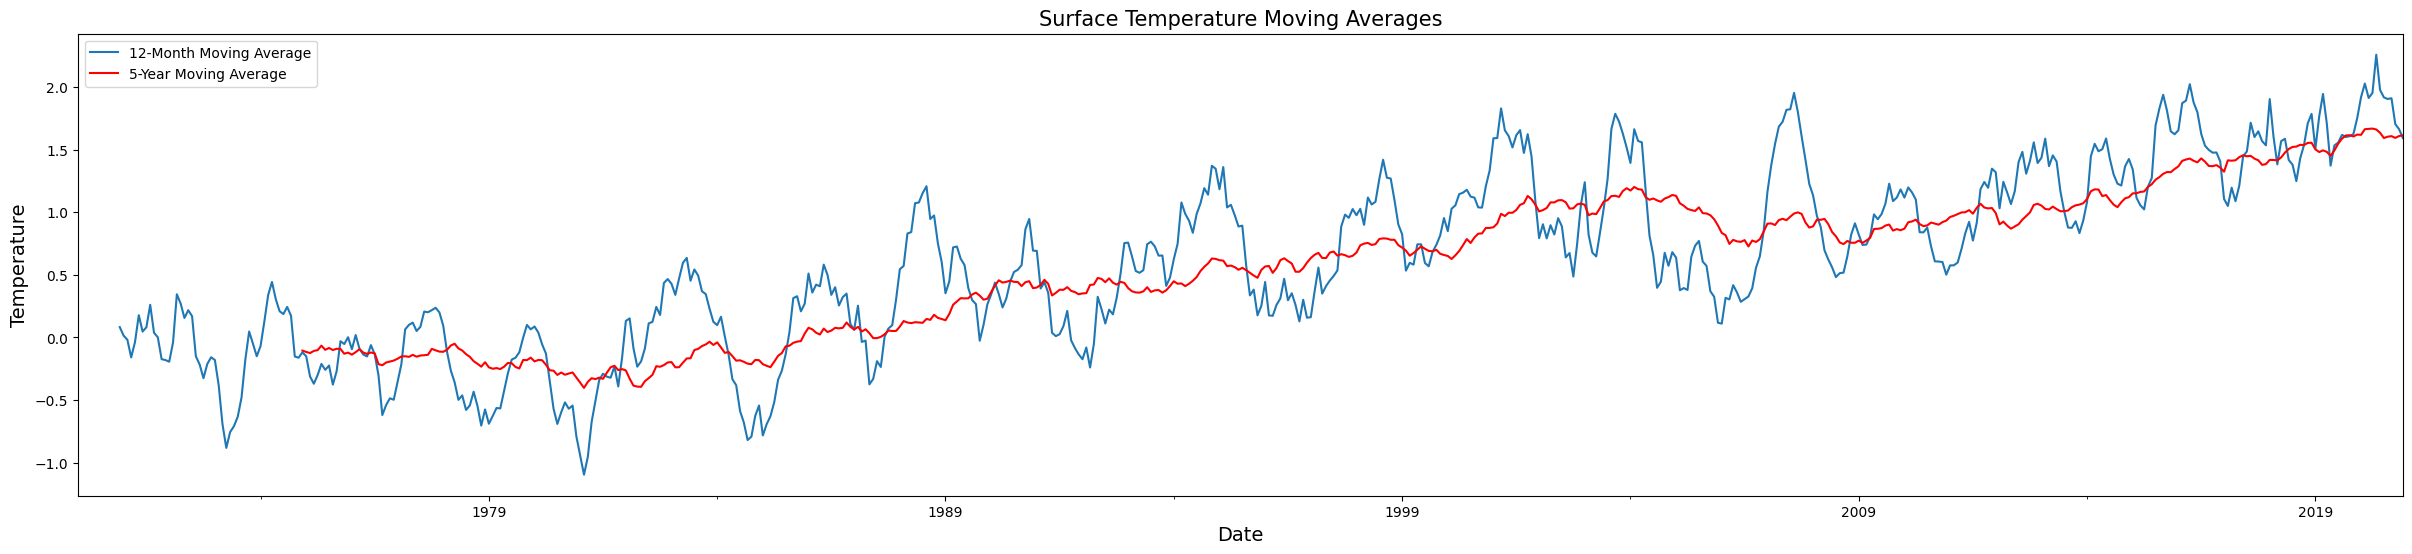

In [7]:
yearly = chennai_data['AvgTemp'].rolling(window = 12).mean()
fiveyearly = chennai_data['AvgTemp'].rolling(window = 60).mean()
MAax = yearly['1970':].plot(figsize = (30, 6), label = '12-Month Moving Average')
fiveyearly['1970':].plot(ax = MAax, color = 'red', label = '5-Year Moving Average')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Surface Temperature Moving Averages', fontsize = 15)
plt.legend()
plt.show()

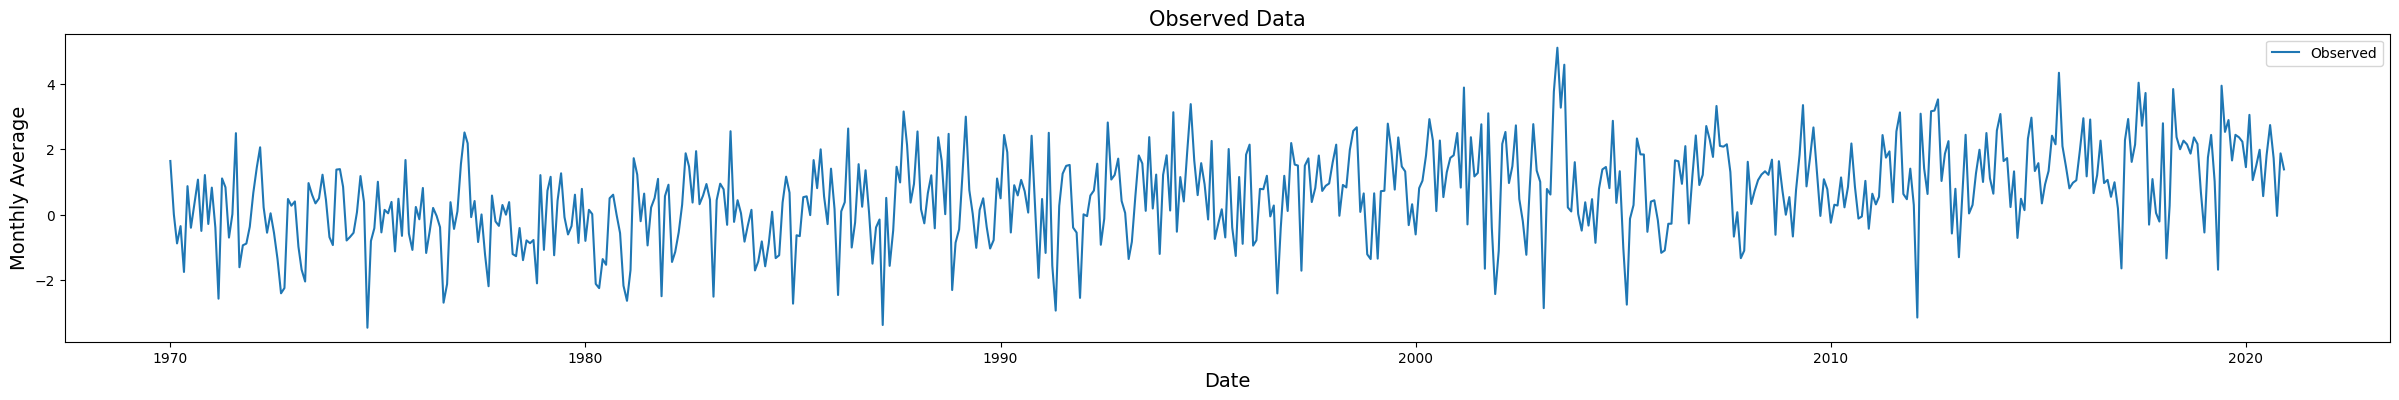

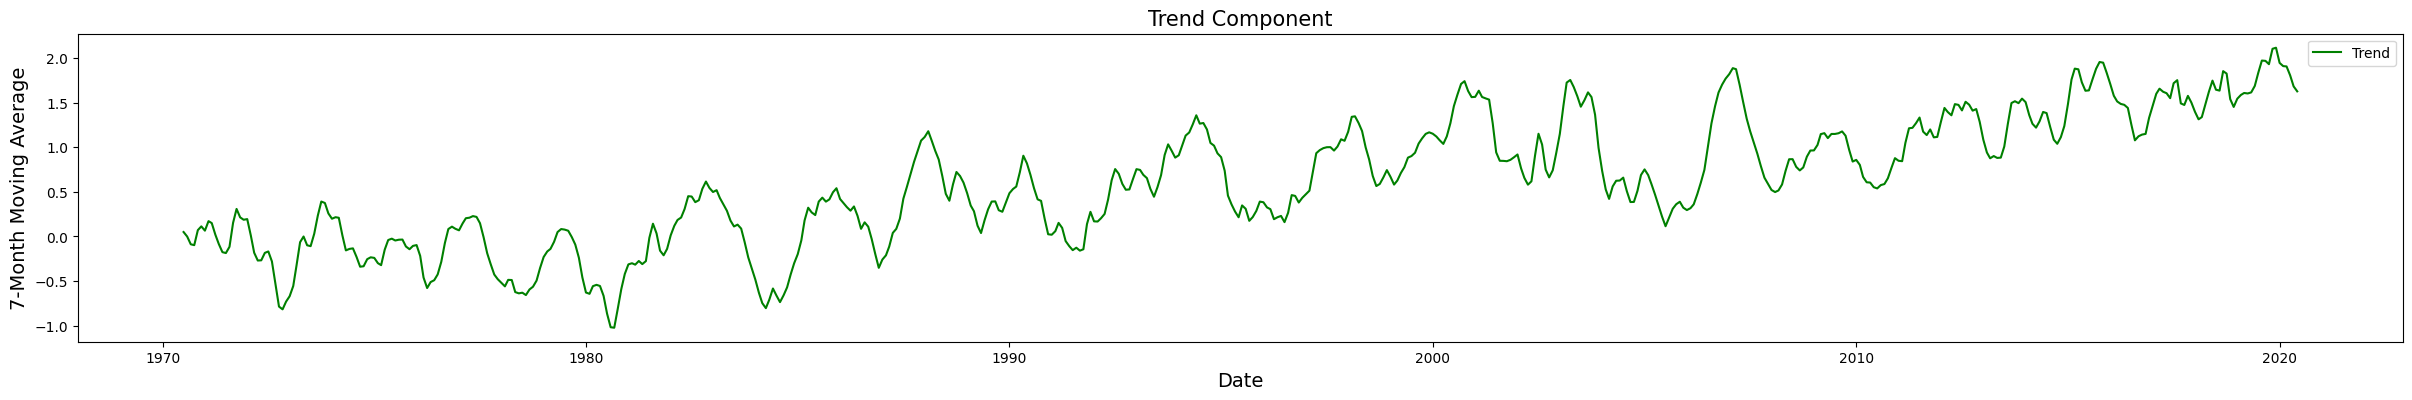

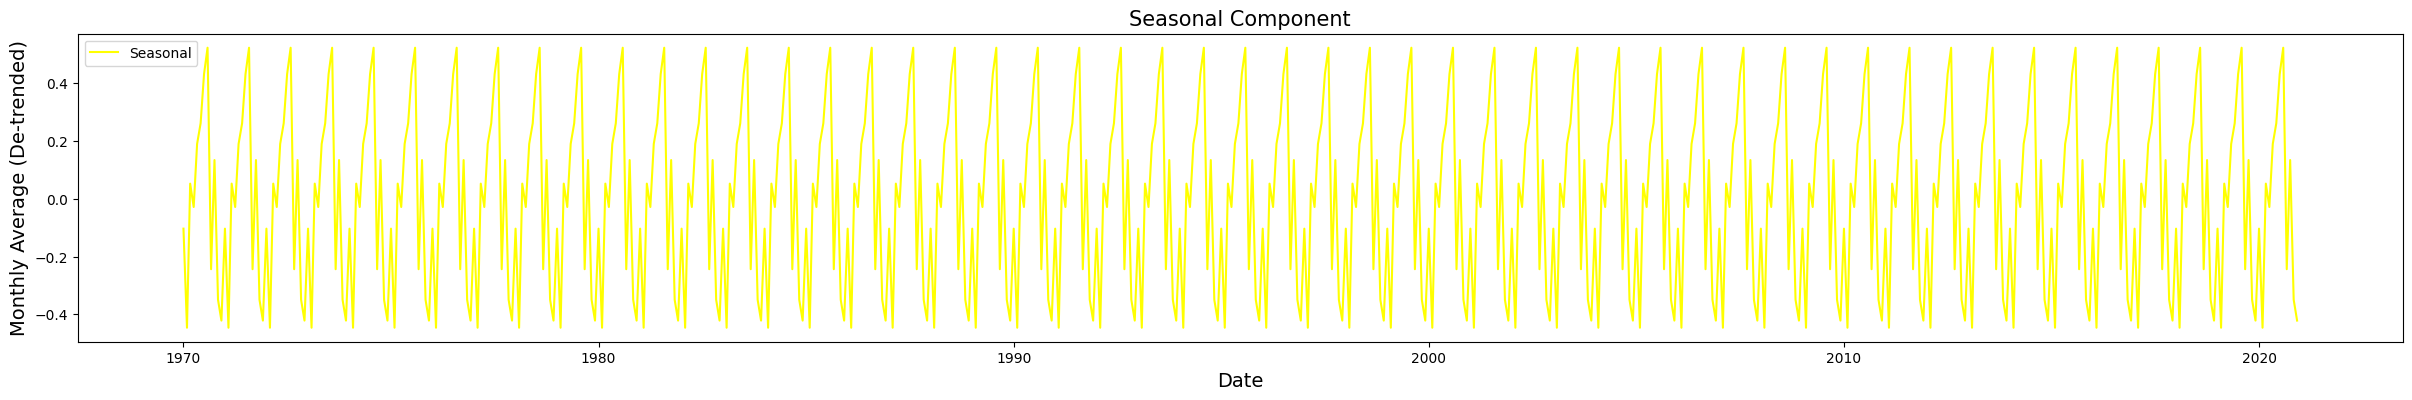

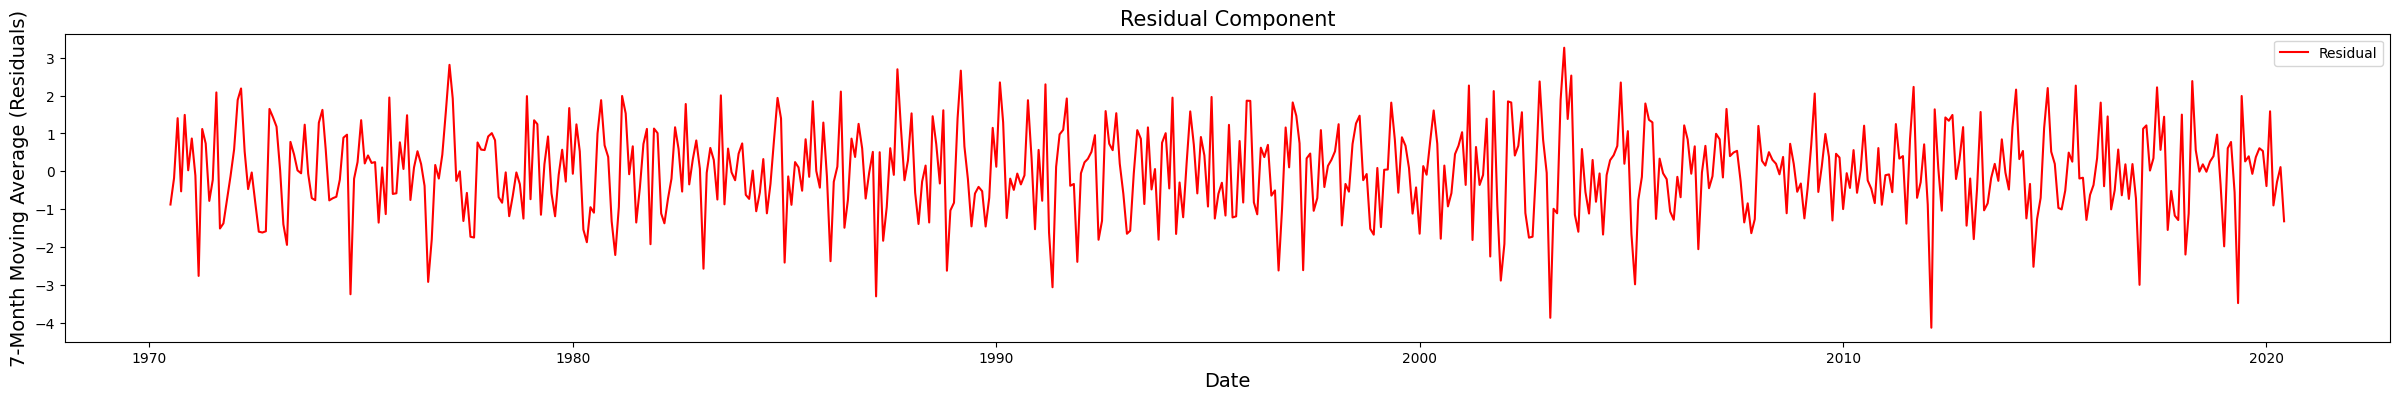

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Decomposing the time series:
decomposition = seasonal_decompose(chennai_data)

#Plotting the observed values:
observed = decomposition.observed
plt.figure(figsize = (30, 4))
plt.plot(observed, label = 'Observed')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Observed Data", fontsize = 15)
plt.show()

#Plotting the trend component:
trend = decomposition.trend
plt.figure(figsize = (30, 4))
plt.plot(trend, label = 'Trend', color = 'green')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Trend Component", fontsize = 15)
plt.show()

#Plotting the seasonal component:
seasonal = decomposition.seasonal
plt.figure(figsize = (30, 4))
plt.plot(seasonal, label = 'Seasonal', color = 'yellow')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average (De-trended)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Seasonal Component", fontsize = 15)
plt.show()

#Plotting the residual component:
residual = decomposition.resid
plt.figure(figsize = (30, 4))
plt.plot(residual, label = 'Residual', color = 'red')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average (Residuals)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Residual Component", fontsize = 15)
plt.show()

## Secondo Task

In [9]:
chennai_data = data[data.Region == 'Europe']
chennai_data.head()

,Region,Country,CityCode,City,Month,Year,AvgTemp,Date
Date,,,,,,,,
1900-01-01,Europe,Greece,62,Izmir,1,1900,1.086,1900-01-01
1900-02-01,Europe,Greece,62,Izmir,2,1900,1.559,1900-02-01
1900-03-01,Europe,Greece,62,Izmir,3,1900,-1.228,1900-03-01
1900-04-01,Europe,Greece,62,Izmir,4,1900,-0.608,1900-04-01
1900-05-01,Europe,Greece,62,Izmir,5,1900,-0.806,1900-05-01


In [10]:
chennai_data = chennai_data['1970':]
cols = ['Region', 'Country', 'CityCode', 'City', 'Year', 'Month']
chennai_data.drop(cols, axis = 1, inplace = True)
chennai_data

,AvgTemp,Date
Date,,
1970-01-01,1.674,1970-01-01
1970-02-01,1.687,1970-02-01
1970-03-01,1.224,1970-03-01
1970-04-01,1.661,1970-04-01
1970-05-01,-0.874,1970-05-01
...,...,...
2020-08-01,0.881,2020-08-01
2020-09-01,2.645,2020-09-01
2020-10-01,3.298,2020-10-01


In [11]:
chennai_data = chennai_data.groupby(pd.Grouper(key = 'Date', axis = 0, freq = 'M')).mean()

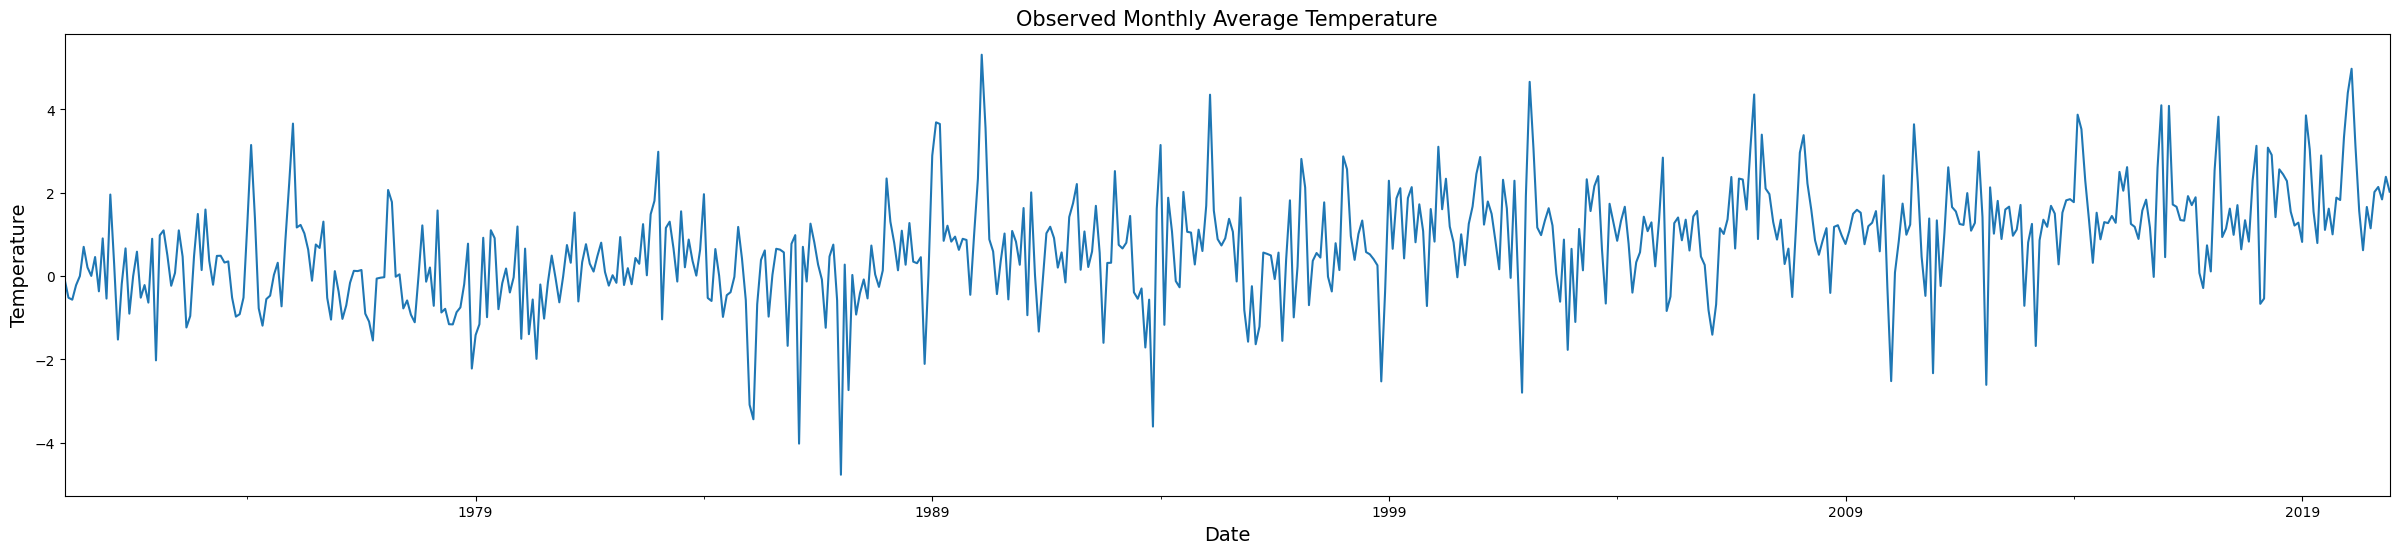

In [12]:
chennai_data.plot(figsize = (30, 6), legend = None)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Observed Monthly Average Temperature', fontsize = 15)
plt.show()

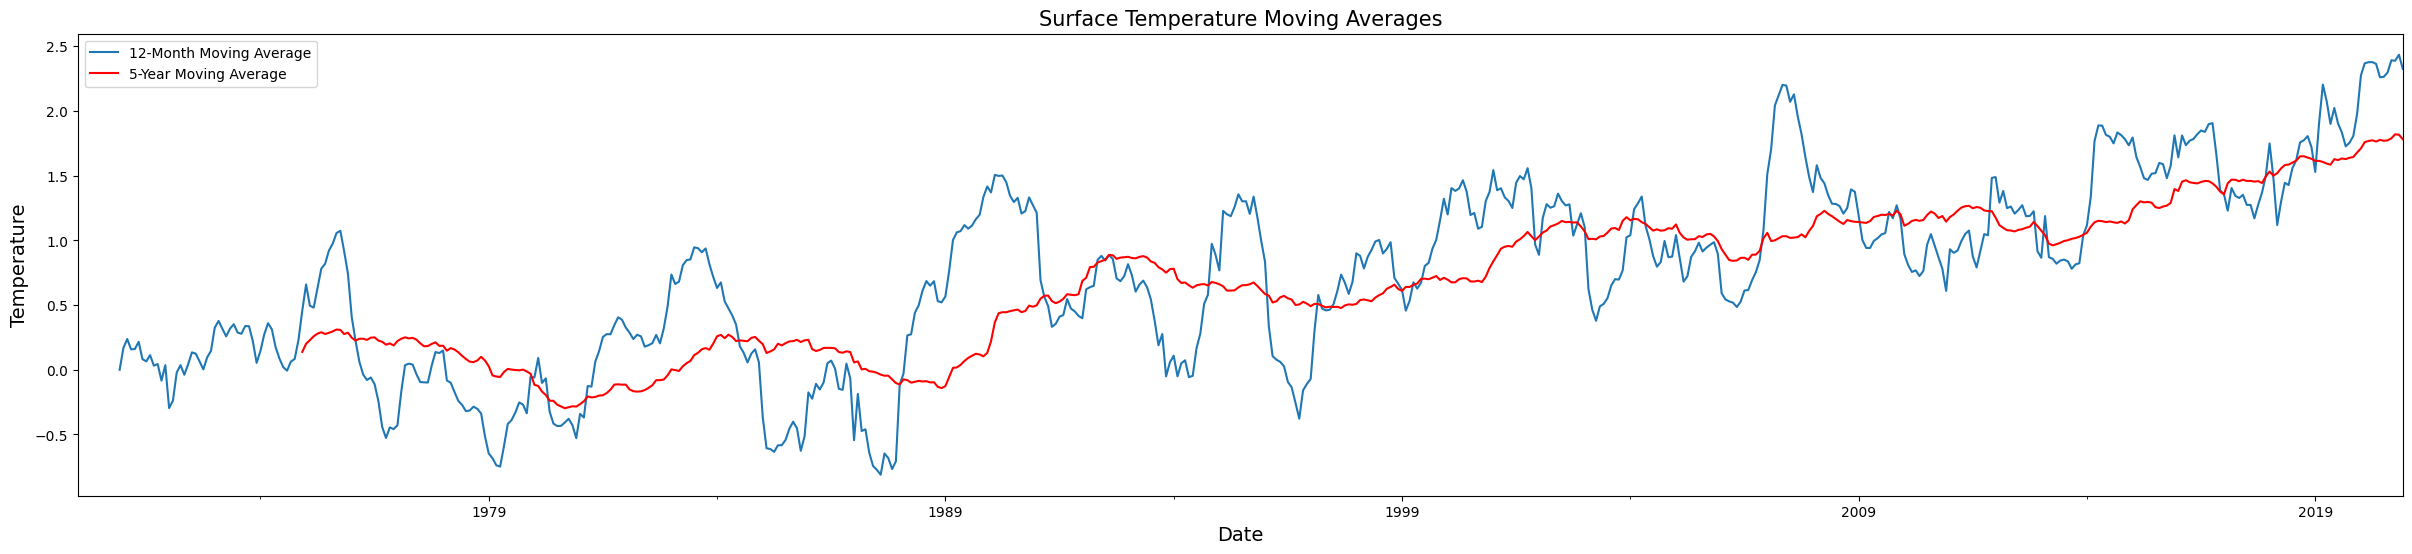

In [13]:
yearly = chennai_data['AvgTemp'].rolling(window = 12).mean()
fiveyearly = chennai_data['AvgTemp'].rolling(window = 60).mean()
MAax = yearly['1970':].plot(figsize = (30, 6), label = '12-Month Moving Average')
fiveyearly['1970':].plot(ax = MAax, color = 'red', label = '5-Year Moving Average')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Surface Temperature Moving Averages', fontsize = 15)
plt.legend()
plt.show()

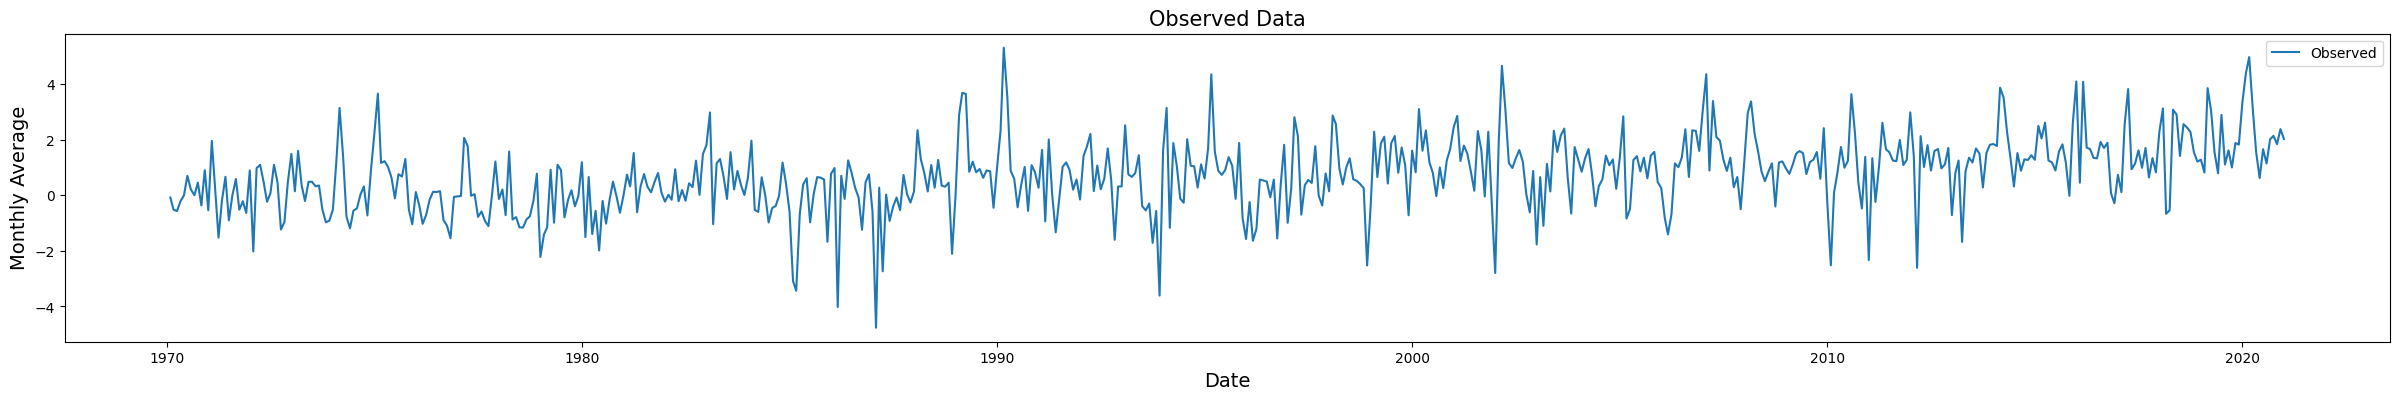

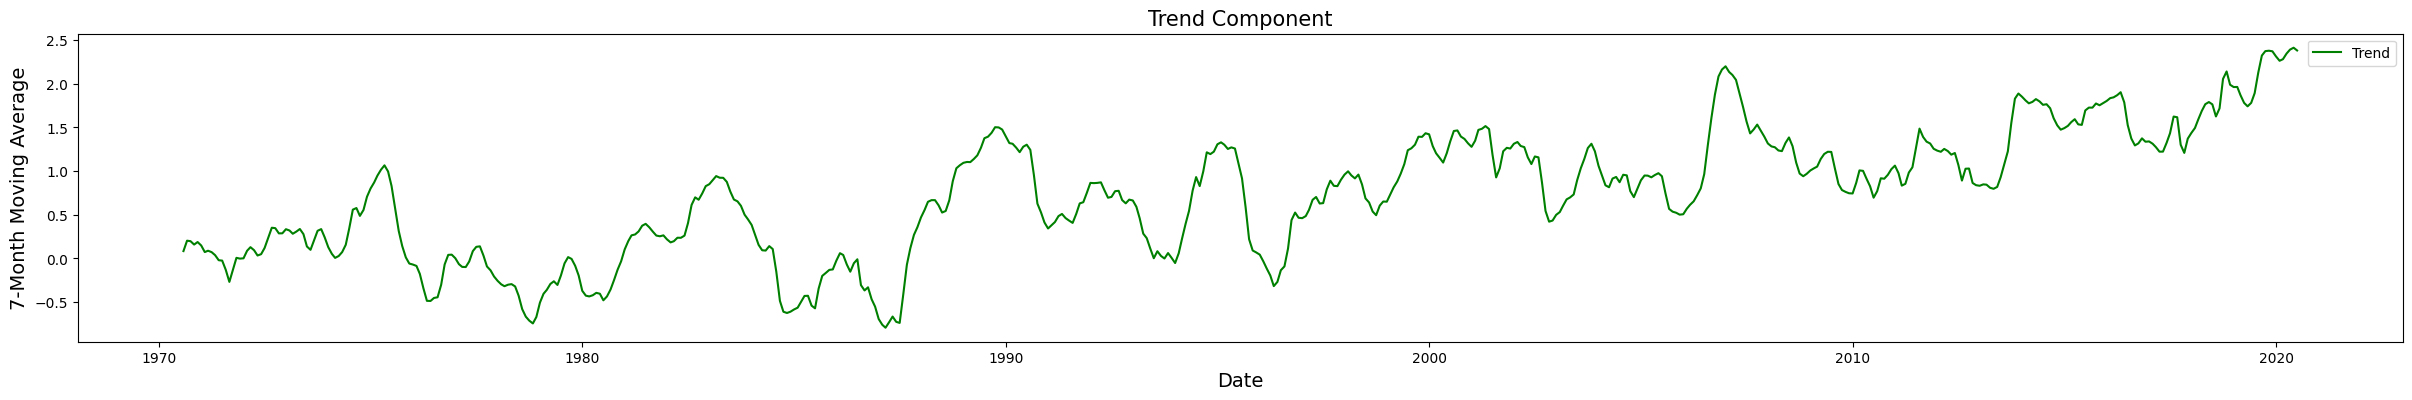

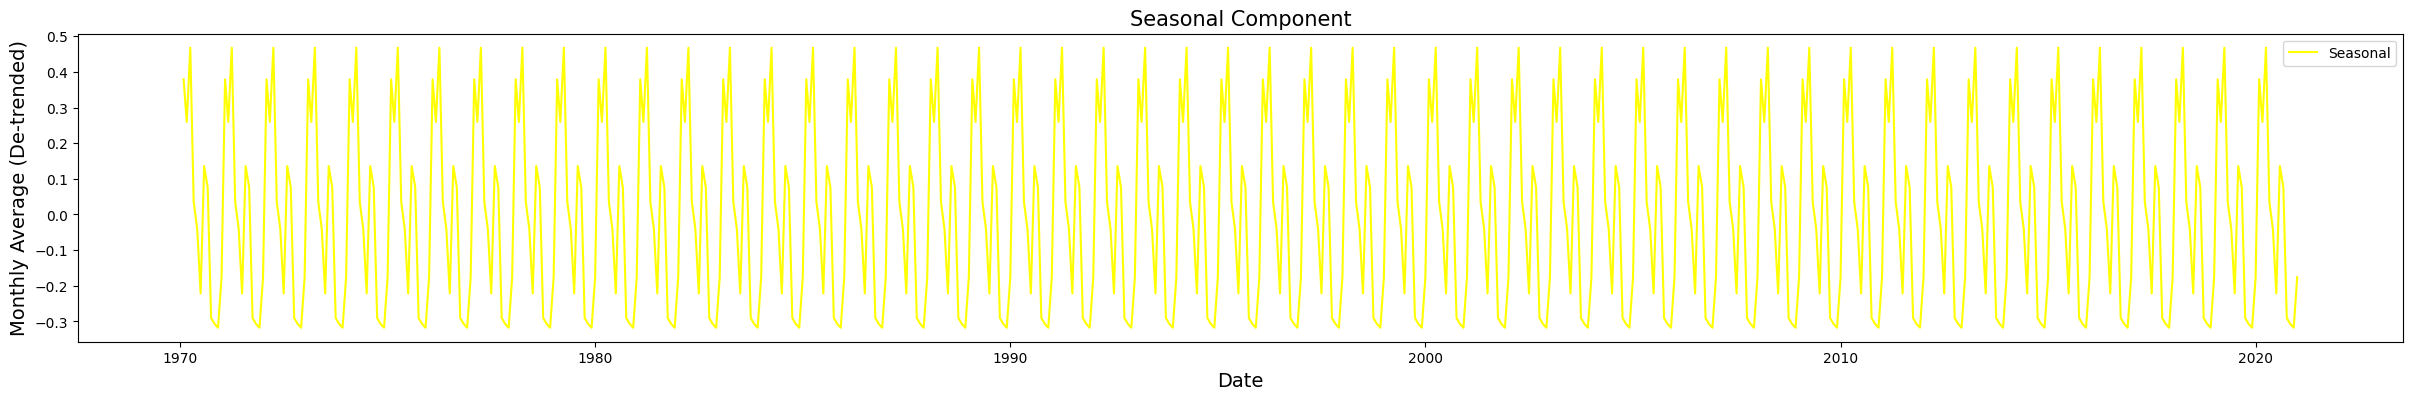

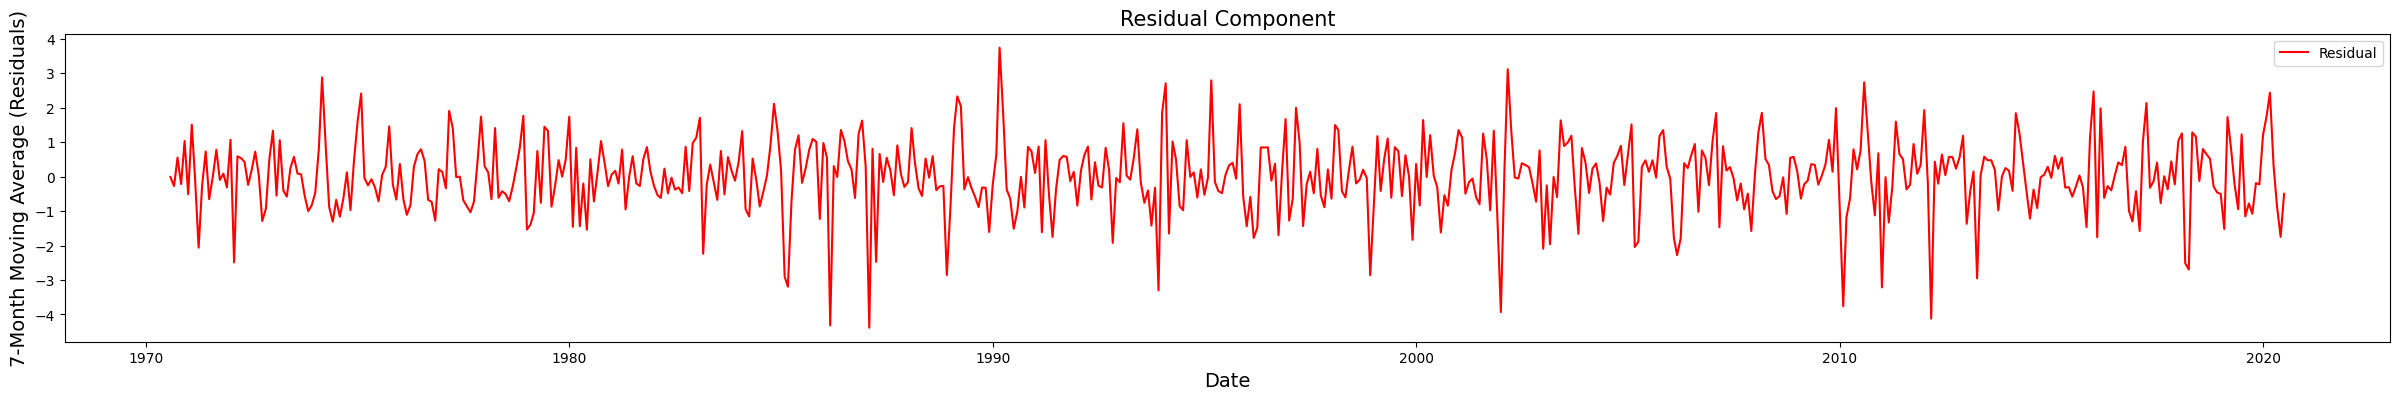

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Decomposing the time series:
decomposition = seasonal_decompose(chennai_data)

#Plotting the observed values:
observed = decomposition.observed
plt.figure(figsize = (30, 4))
plt.plot(observed, label = 'Observed')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Observed Data", fontsize = 15)
plt.show()

#Plotting the trend component:
trend = decomposition.trend
plt.figure(figsize = (30, 4))
plt.plot(trend, label = 'Trend', color = 'green')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Trend Component", fontsize = 15)
plt.show()

#Plotting the seasonal component:
seasonal = decomposition.seasonal
plt.figure(figsize = (30, 4))
plt.plot(seasonal, label = 'Seasonal', color = 'yellow')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average (De-trended)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Seasonal Component", fontsize = 15)
plt.show()

#Plotting the residual component:
residual = decomposition.resid
plt.figure(figsize = (30, 4))
plt.plot(residual, label = 'Residual', color = 'red')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average (Residuals)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Residual Component", fontsize = 15)
plt.show()

## Terzo Task

In [14]:
chennai_data = data[data.Country == 'India']
chennai_data.head()

,Region,Country,CityCode,City,Month,Year,AvgTemp,Date
Date,,,,,,,,
1900-01-01,Asia,India,3,Maisuru,1,1900,0.651,1900-01-01
1900-02-01,Asia,India,3,Maisuru,2,1900,0.856,1900-02-01
1900-03-01,Asia,India,3,Maisuru,3,1900,0.821,1900-03-01
1900-04-01,Asia,India,3,Maisuru,4,1900,0.438,1900-04-01
1900-05-01,Asia,India,3,Maisuru,5,1900,1.076,1900-05-01


In [15]:
chennai_data = chennai_data['1970':]
cols = ['Region', 'Country', 'CityCode', 'City', 'Year', 'Month']
chennai_data.drop(cols, axis = 1, inplace = True)
chennai_data

,AvgTemp,Date
Date,,
1970-01-01,0.505,1970-01-01
1970-02-01,0.167,1970-02-01
1970-03-01,0.192,1970-03-01
1970-04-01,0.113,1970-04-01
1970-05-01,-0.043,1970-05-01
...,...,...
2020-08-01,1.005,2020-08-01
2020-09-01,2.108,2020-09-01
2020-10-01,1.162,2020-10-01


In [16]:
chennai_data = chennai_data.groupby(pd.Grouper(key = 'Date', axis = 0, freq = 'M')).mean()

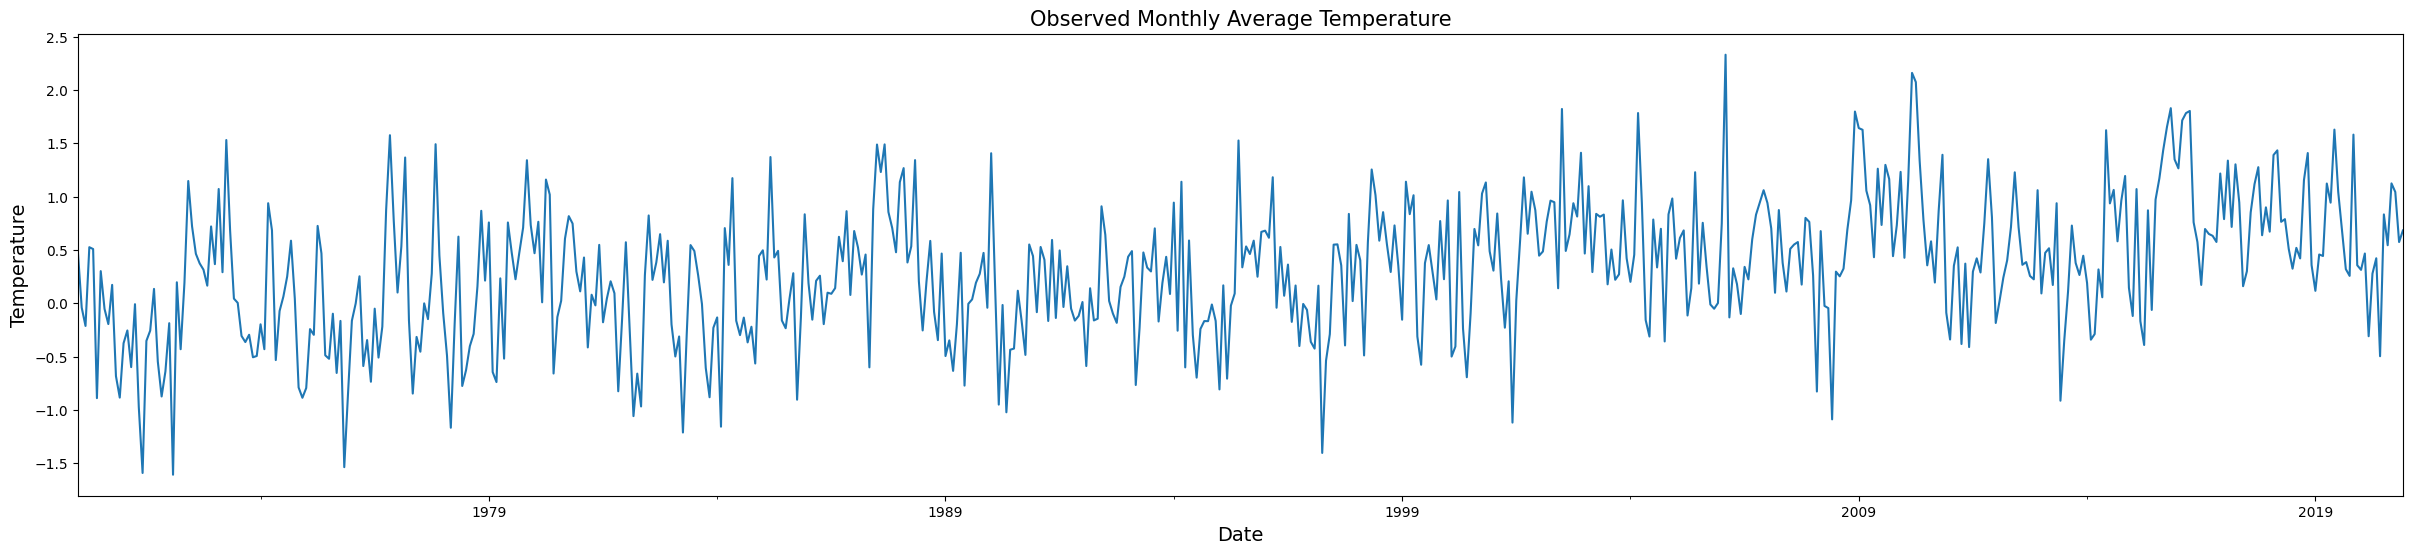

In [17]:
chennai_data.plot(figsize = (30, 6), legend = None)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Observed Monthly Average Temperature', fontsize = 15)
plt.show()

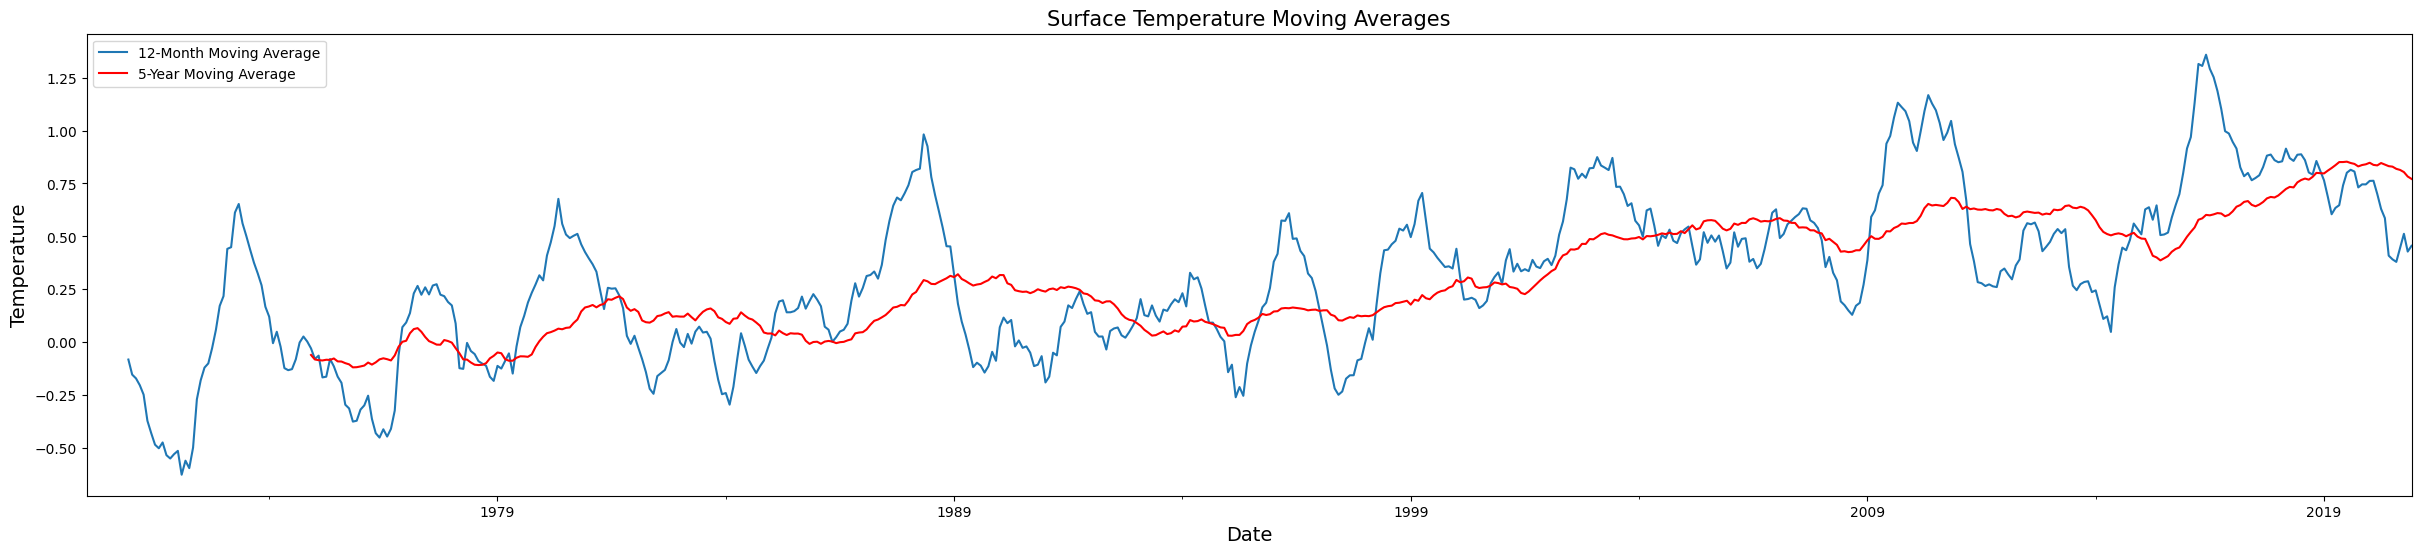

In [18]:
yearly = chennai_data['AvgTemp'].rolling(window = 12).mean()
fiveyearly = chennai_data['AvgTemp'].rolling(window = 60).mean()
MAax = yearly['1970':].plot(figsize = (30, 6), label = '12-Month Moving Average')
fiveyearly['1970':].plot(ax = MAax, color = 'red', label = '5-Year Moving Average')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Surface Temperature Moving Averages', fontsize = 15)
plt.legend()
plt.show()

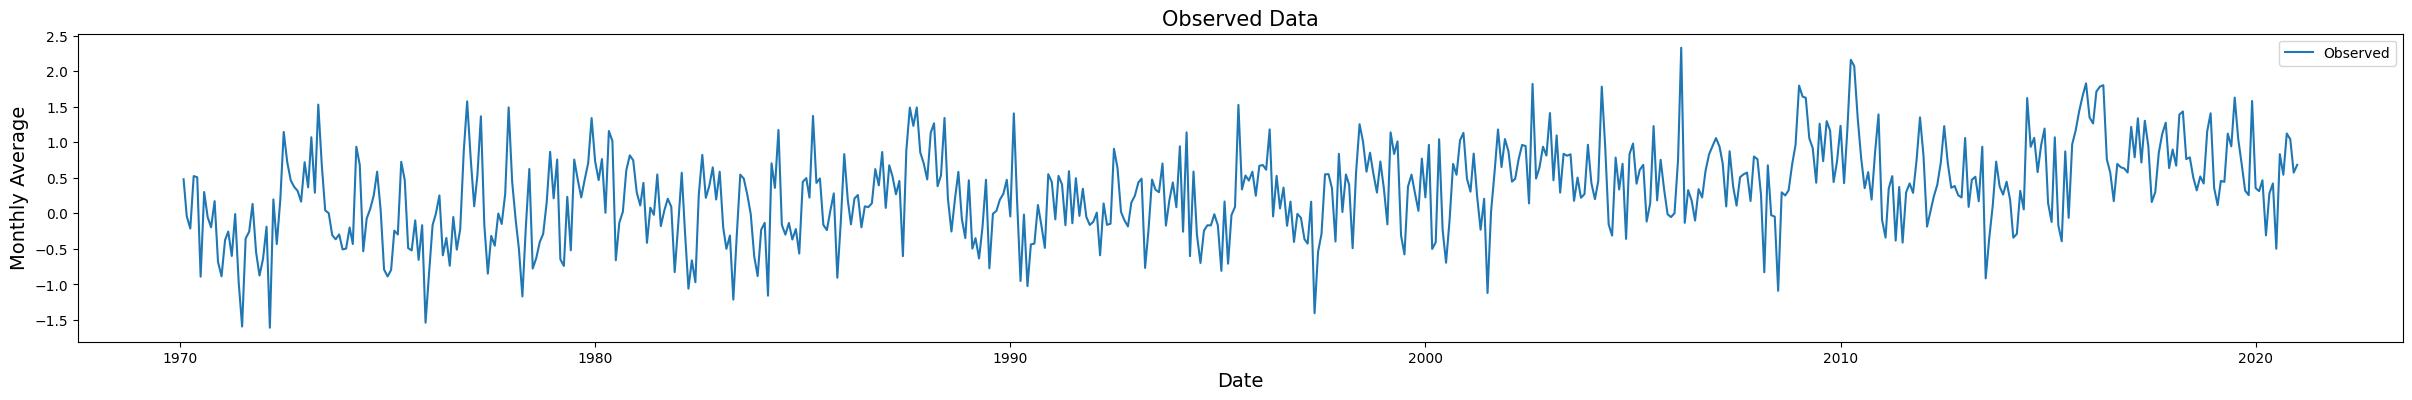

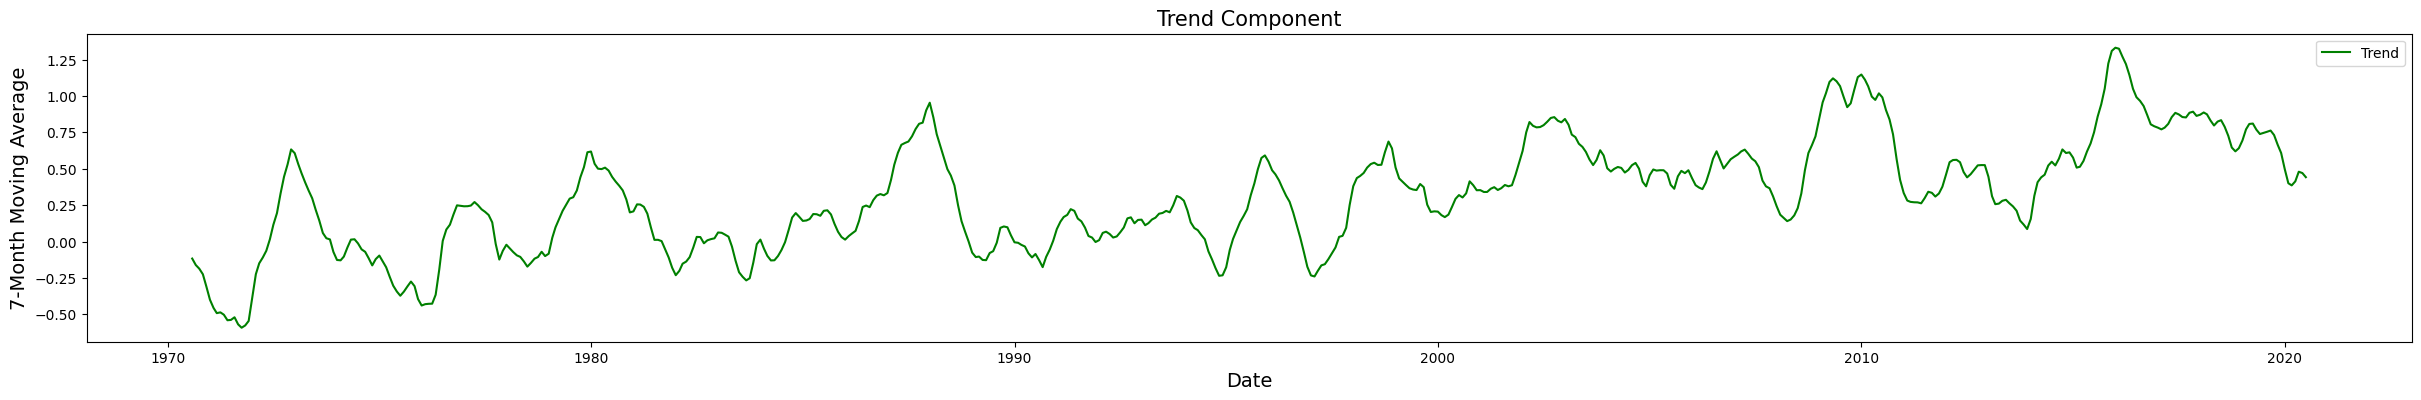

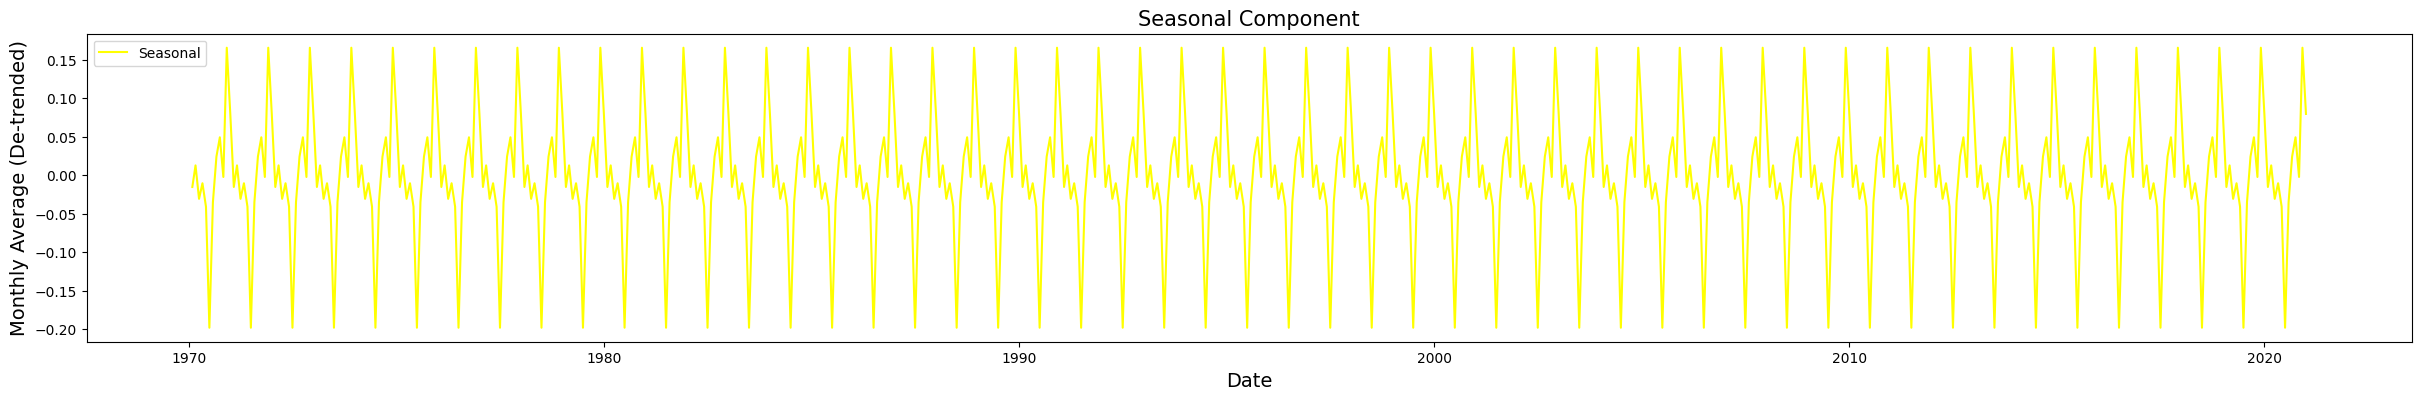

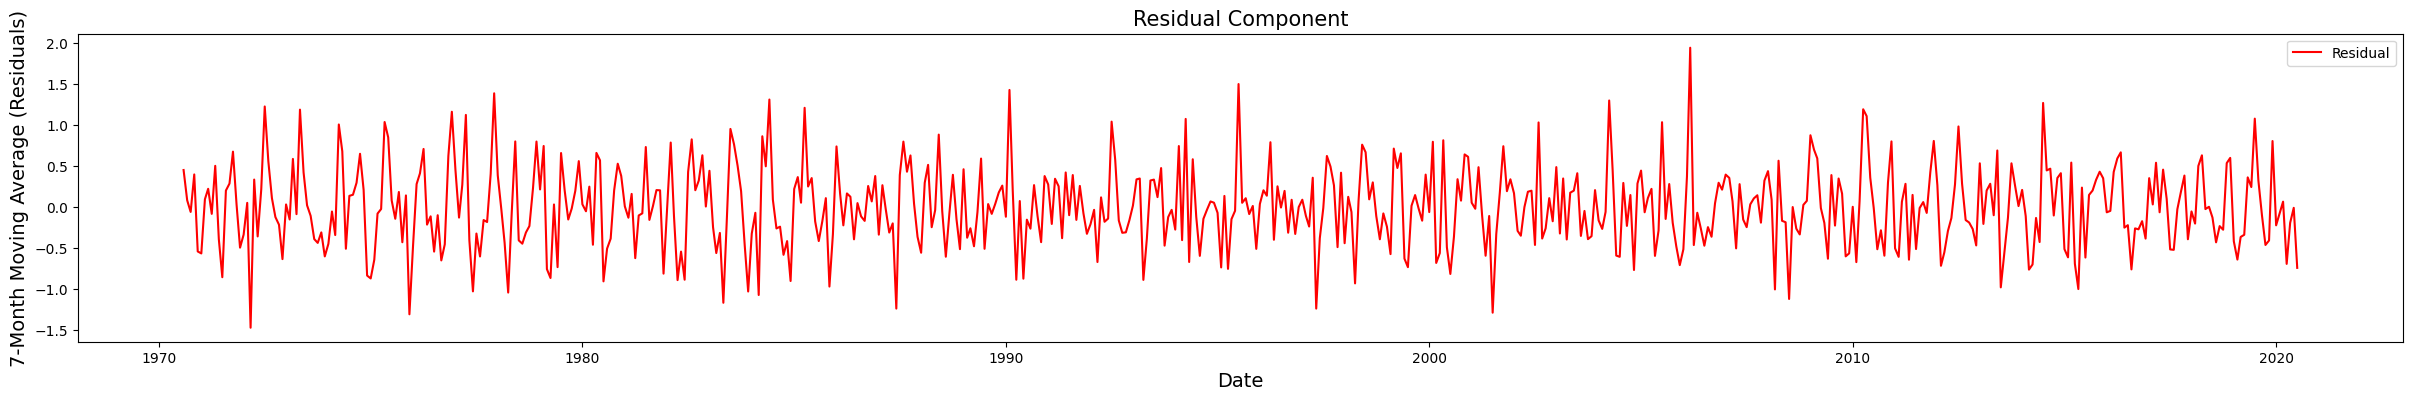

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Decomposing the time series:
decomposition = seasonal_decompose(chennai_data)

#Plotting the observed values:
observed = decomposition.observed
plt.figure(figsize = (30, 4))
plt.plot(observed, label = 'Observed')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Observed Data", fontsize = 15)
plt.show()

#Plotting the trend component:
trend = decomposition.trend
plt.figure(figsize = (30, 4))
plt.plot(trend, label = 'Trend', color = 'green')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Trend Component", fontsize = 15)
plt.show()

#Plotting the seasonal component:
seasonal = decomposition.seasonal
plt.figure(figsize = (30, 4))
plt.plot(seasonal, label = 'Seasonal', color = 'yellow')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average (De-trended)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Seasonal Component", fontsize = 15)
plt.show()

#Plotting the residual component:
residual = decomposition.resid
plt.figure(figsize = (30, 4))
plt.plot(residual, label = 'Residual', color = 'red')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average (Residuals)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Residual Component", fontsize = 15)
plt.show()

In [20]:
cols = ['Region', 'Country', 'Date', 'City', 'Year', 'Month']
data.drop(cols, axis = 1, inplace = True)
#chennai_data = data.groupby(pd.Grouper(key = 'CityCode', axis = 0, freq = 'M')).mean()

In [21]:
data

,CityCode,AvgTemp
Date,,
1900-01-01,0,-0.193
1900-02-01,0,-0.061
1900-03-01,0,-0.065
1900-04-01,0,0.022
1900-05-01,0,-0.001
...,...,...
2020-08-01,94,2.118
2020-09-01,94,1.402
2020-10-01,94,1.438


In [22]:
data.groupby(['CityCode']).mean()

,AvgTemp
CityCode,
0,0.051824
1,0.242180
2,0.077411
3,0.172046
4,0.233191
...,...
90,0.195841
91,-0.018473
92,0.176368
